# Detector

## How to use the Feat Detector class.

*Written by Jin Hyun Cheong*

Here is an example of how to use the `Detector` class to detect faces, facial landmarks, Action Units, and emotions, from face images or videos. 

## Detecting facial expressions from images. 

First, load the detector class. You can specify which models you want to use.

In [1]:
from feat import Detector
face_model = "retinaface"
landmark_model = "mobilenet"
au_model = "jaanet"
emotion_model = "fer"
detector = Detector()

Loading Face Detection model:  retinaface
Loading Face Landmark model:  MobileNet
Loading Action Unit model:  jaanet
Loading Emotion model:  fer


Find the file you want to process. In our case, we'll use our test image `input.jpg`. 

In [2]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os
test_data_dir = get_test_data_path()
test_image = os.path.join(test_data_dir, "input.jpg")

Here is what our test image looks like.

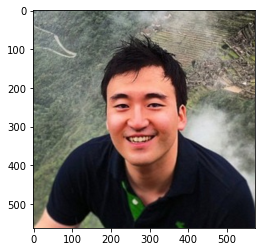

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
f, ax = plt.subplots()
im = Image.open(test_image)
ax.imshow(im);

Now we use our initialized `detector` instance to make predictions with the `detect_image()` method.

In [16]:
image_prediction = detector.detect_image(test_image)
# Show results
image_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.39479,...,0.002872,0.000004,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...


The output is a `Fex` class instance which allows you to run the built-in methods for `Fex`. 

## Visualizing detection results.

For example, you can easily plot the detection results. 

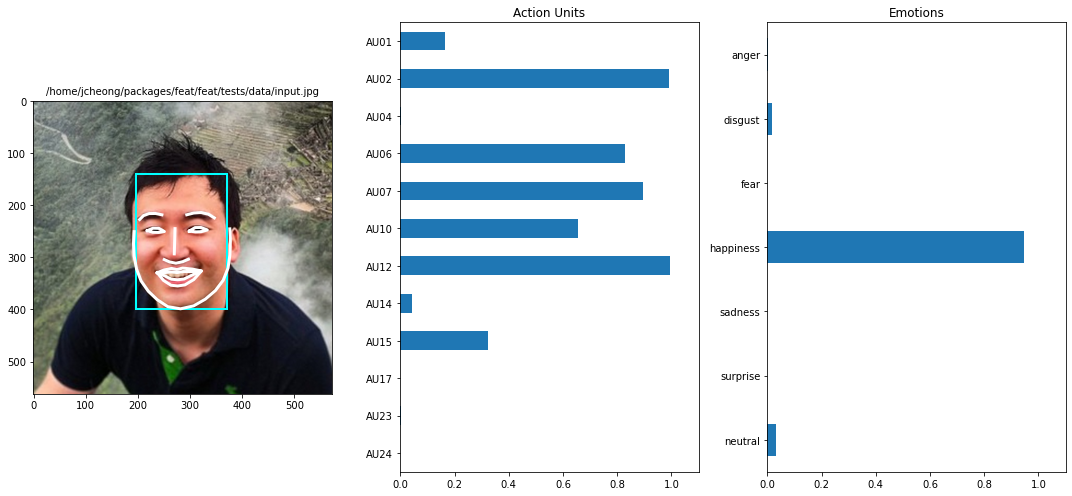

In [18]:
image_prediction.plot_detections();

## Accessing face expression columns of interest.  

You can also access the columns of interests (AUs, emotion) quickly. 

In [21]:
image_prediction.facebox()

,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore
0,196.976852,140.997742,173.810471,257.639343,0.999681


In [19]:
image_prediction.aus()

,AU01,AU02,AU04,AU06,AU07,AU10,AU12,AU14,AU15,AU17,AU23,AU24
0,0.16389,0.990565,0.001981,0.827827,0.895377,0.654377,0.995468,0.041832,0.324254,0.000614,0.002872,0.000004


In [22]:
image_prediction.emotions()

,anger,disgust,fear,happiness,sadness,surprise,neutral
0,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602


## Detecting facial expressions and saving to a file. 

You can also output the results into file by specifying the `outputFname`. The detector will return `True` when it's finished. 

In [11]:
detector.detect_image(test_image, outputFname = "output.csv")

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


True

## Loading detection results from saved file. 

The outputs can be loaded using our `read_feat()` function or a simple Pandas `read_csv()`. We recommend using `read_feat()` because that will allow you to use the full suite of Feat functionalities more easily.

In [13]:
from feat.utils import read_feat
image_prediction = read_feat("output.csv")
# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.39479,...,0.002872,0.000004,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...


In [14]:
import pandas as pd
image_prediction = pd.read_csv("output.csv")
# Show results
image_prediction

,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.39479,...,0.002872,0.000004,0.001737,0.017439,0.000756,0.94757,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...


## Detecting facial expressions images with many faces. 
Feat's Detector can find multiple faces in a single image. 

In [27]:
test_image = glob.glob(os.path.join(test_data_dir, "tim-mossholder-hOF1bWoet_Q-unsplash.jpg"))
image_prediction = detector.detect_image(test_image)
# Show results
image_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0,683.844116,288.876495,103.788025,134.104675,0.999768,686.784070,684.581417,683.259731,683.543446,...,0.000047,2.072674e-08,0.000488,0.005617,0.000796,0.951391,0.001863,0.004160,0.035685,/home/jcheong/packages/feat/feat/tests/data/ti...
1,0,533.678894,309.400024,96.237732,124.128448,0.999421,536.352311,533.773776,532.264484,532.354007,...,0.000067,2.451054e-09,0.000284,0.006320,0.001193,0.971111,0.000716,0.000561,0.019815,/home/jcheong/packages/feat/feat/tests/data/ti...
2,0,316.984406,233.779205,92.016876,126.462952,0.999196,314.601801,315.569317,317.556657,320.979813,...,0.000409,2.915924e-07,0.000121,0.002568,0.000227,0.899846,0.001718,0.001472,0.094047,/home/jcheong/packages/feat/feat/tests/data/ti...
3,0,221.297470,64.152290,85.109238,109.057457,0.996842,221.084806,218.956038,217.532470,217.588805,...,0.000014,1.441462e-08,0.000620,0.004256,0.000250,0.903749,0.000306,0.002786,0.088032,/home/jcheong/packages/feat/feat/tests/data/ti...
4,0,437.129089,213.861359,79.529785,97.050537,0.996773,439.015782,438.598763,439.106142,440.473301,...,0.000018,4.327078e-09,0.001339,0.018785,0.000607,0.661113,0.047018,0.000741,0.270397,/home/jcheong/packages/feat/feat/tests/data/ti...


## Visualize multiple faces in a single image.

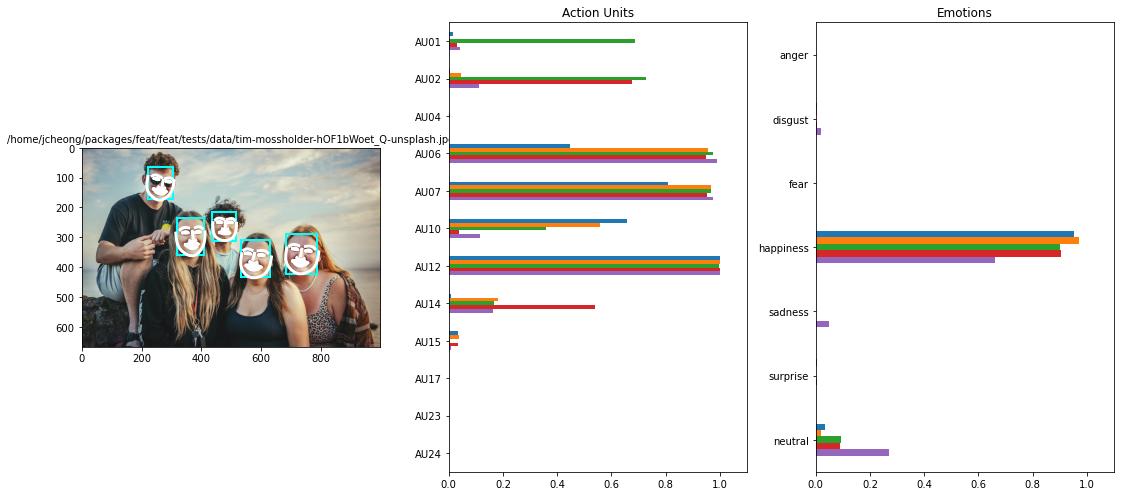

In [28]:
image_prediction.plot_detections();

## Detecting facial expressions from multiple images
You can also detect facial expressions from a list of images. Just place the path to images in a list and pass it to `detect_images`. 

In [11]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os, glob
test_data_dir = get_test_data_path()
test_images = glob.glob(os.path.join(test_data_dir, "*.jpg"))
print(test_images)

image_prediction = detector.detect_image(test_images)
image_prediction

['/home/jcheong/packages/feat/feat/tests/data/input.jpg', '/home/jcheong/packages/feat/feat/tests/data/tim-mossholder-hOF1bWoet_Q-unsplash.jpg']


/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,196.976852,140.997742,173.810471,257.639343,0.999681,192.864591,191.586714,192.874615,197.394790,...,0.002872,3.748603e-06,0.001737,0.017439,0.000756,0.947570,0.000364,0.000533,0.031602,/home/jcheong/packages/feat/feat/tests/data/in...
0,0.0,683.844116,288.876495,103.788025,134.104675,0.999768,686.784070,684.581417,683.259731,683.543446,...,0.000047,2.072674e-08,0.000488,0.005617,0.000796,0.951391,0.001863,0.004160,0.035685,/home/jcheong/packages/feat/feat/tests/data/ti...
1,0.0,533.678894,309.400024,96.237732,124.128448,0.999421,536.352311,533.773776,532.264484,532.354007,...,0.000067,2.451054e-09,0.000284,0.006320,0.001193,0.971111,0.000716,0.000561,0.019815,/home/jcheong/packages/feat/feat/tests/data/ti...
2,0.0,316.984406,233.779205,92.016876,126.462952,0.999196,314.601801,315.569317,317.556657,320.979813,...,0.000409,2.915924e-07,0.000121,0.002568,0.000227,0.899846,0.001718,0.001472,0.094047,/home/jcheong/packages/feat/feat/tests/data/ti...
3,0.0,221.297470,64.152290,85.109238,109.057457,0.996842,221.084806,218.956038,217.532470,217.588805,...,0.000014,1.441462e-08,0.000620,0.004256,0.000250,0.903749,0.000306,0.002786,0.088032,/home/jcheong/packages/feat/feat/tests/data/ti...
4,0.0,437.129089,213.861359,79.529785,97.050537,0.996773,439.015782,438.598763,439.106142,440.473301,...,0.000018,4.327078e-09,0.001339,0.018785,0.000607,0.661113,0.047018,0.000741,0.270397,/home/jcheong/packages/feat/feat/tests/data/ti...


When you have multiple images, you can still call the plot_detection which will plot results for all input images. If you have a lot of images, we recommend checking one by one using slicing. 

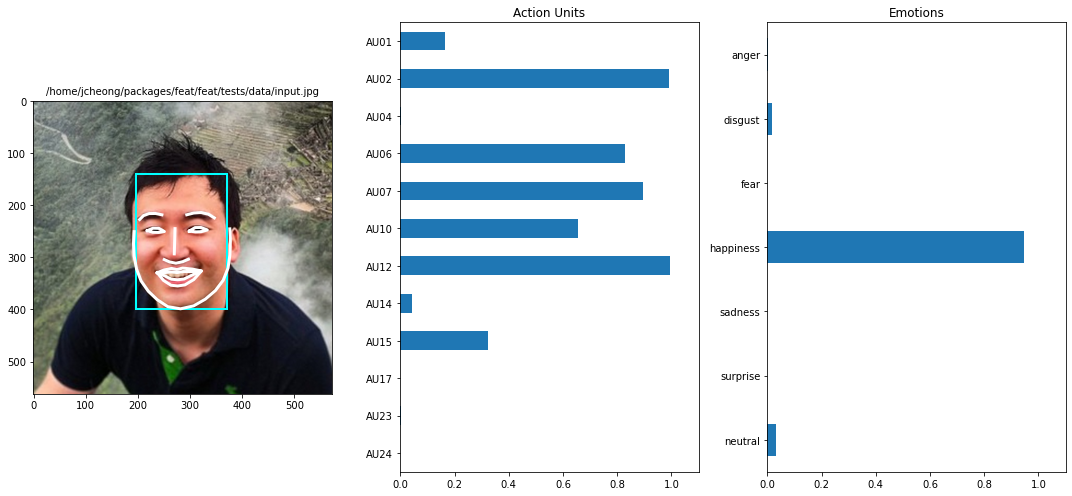

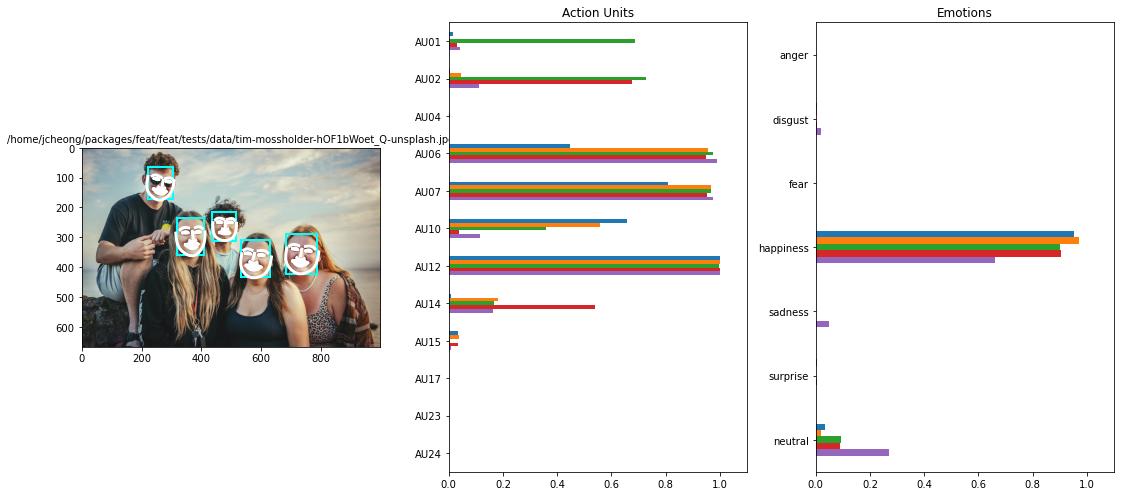

In [12]:
image_prediction.plot_detections();

You can use the slicing function to plot specific rows in the detection results or for a particular input file.

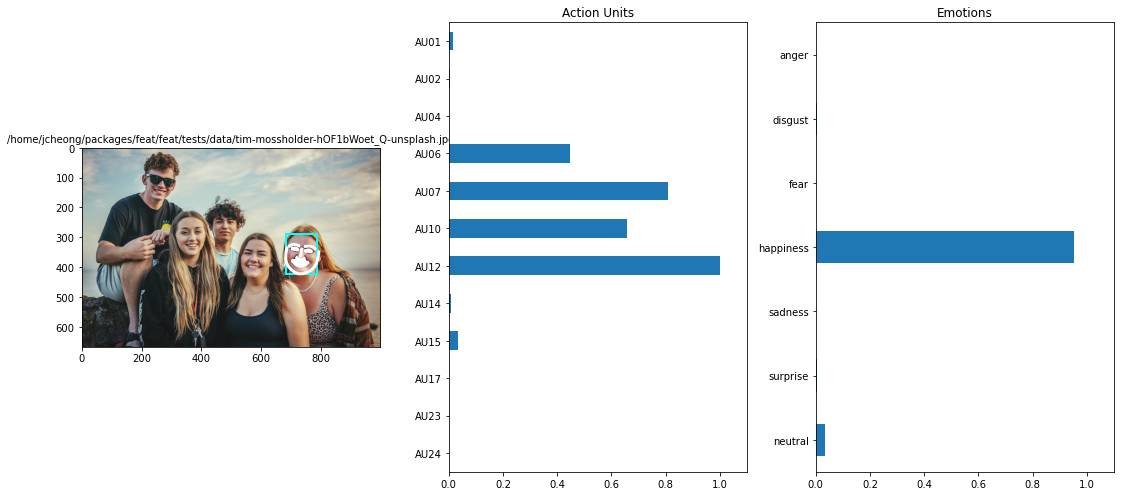

In [45]:
image_prediction.iloc[[1]].plot_detections();

In [ ]:
image_to_plot = image_prediction.input().unique()[1]
image_prediction.query("input == @image_to_plot").plot_detections();

## Detecting facial expressions from videos. 
Detecting facial expressions in videos is also easy by using the `detect_video()` method. This sample video is by [Wolfgang Langer](https://www.pexels.com/@wolfgang-langer-1415383?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels) from [Pexels](https://www.pexels.com/video/a-woman-exhibits-different-emotions-through-facial-expressions-3063838/).

In [9]:
# Find the file you want to process.
from feat.tests.utils import get_test_data_path
import os, glob
test_data_dir = get_test_data_path()
test_video = os.path.join(test_data_dir, "WolfgangLanger_Pexels.mp4")

# Show video
from IPython.display import Video
Video(test_video, embed=True)

Let's predict facial expressions from the video using the `detect_video()` method.

In [11]:
video_prediction = detector.detect_video(test_video)
video_prediction.head()

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


exception occurred


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,334.117889,54.037693,215.074738,293.471466,0.999814,329.997266,331.559383,336.836954,344.936493,...,0.010879,0.002144,0.002376,0.017735,0.003534,0.043448,0.679344,0.000382,0.253180,/home/jcheong/packages/feat/feat/tests/data/Wo...
1,1.0,334.696350,54.557045,214.053772,292.697205,0.999814,329.433781,331.189479,336.568767,344.685601,...,0.005956,0.002272,0.002100,0.017477,0.003784,0.046172,0.674860,0.000452,0.255156,/home/jcheong/packages/feat/feat/tests/data/Wo...
2,2.0,335.436401,55.284416,213.081726,291.650299,0.999821,329.852573,331.535833,336.860531,345.014069,...,0.006748,0.002069,0.001533,0.016694,0.005359,0.036064,0.730688,0.000468,0.209193,/home/jcheong/packages/feat/feat/tests/data/Wo...
3,3.0,335.695801,56.410995,211.726624,289.590271,0.999804,330.581873,332.221322,337.449009,345.461436,...,0.016985,0.001556,0.001333,0.016171,0.005142,0.027576,0.816095,0.000319,0.133362,/home/jcheong/packages/feat/feat/tests/data/Wo...
4,4.0,336.746582,57.888710,210.408081,285.932861,0.999807,330.764068,332.417871,337.529334,345.411309,...,0.027723,0.000518,0.002087,0.019557,0.009824,0.031533,0.854187,0.000510,0.082301,/home/jcheong/packages/feat/feat/tests/data/Wo...


You can also plot the detection results from a video. The frames are not extracted from the video (that will result in thousands of images) so the visualization only shows the detected face without the underlying image.

The video has 24 fps and the actress show sadness around the 0:02, and happiness at 0:14 seconds.

Input image /home/jcheong/packages/feat/feat/tests/data/WolfgangLanger_Pexels.mp4 not found.


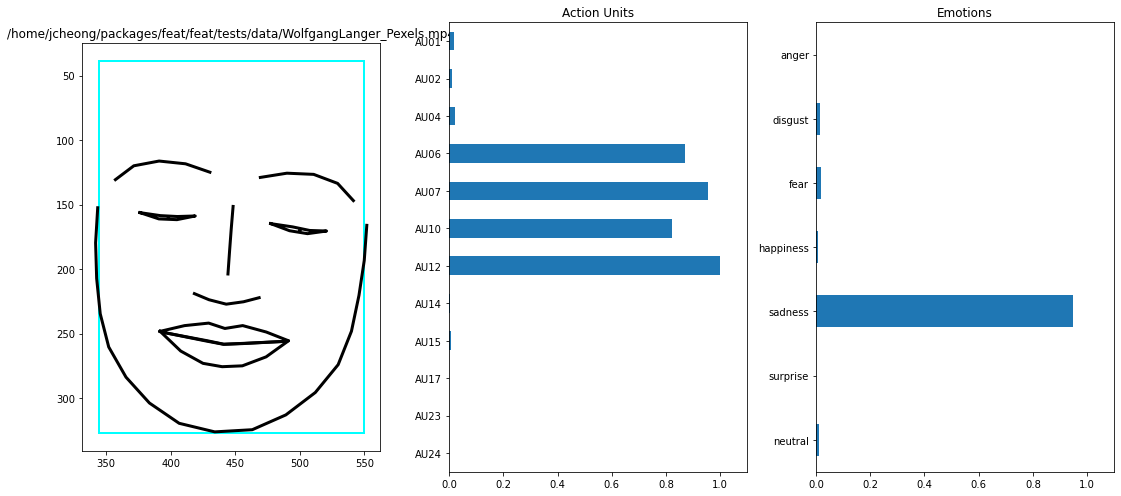

In [8]:
video_prediction.iloc[[2*24]].plot_detections();

Input image /home/jcheong/packages/feat/feat/tests/data/WolfgangLanger_Pexels.mp4 not found.


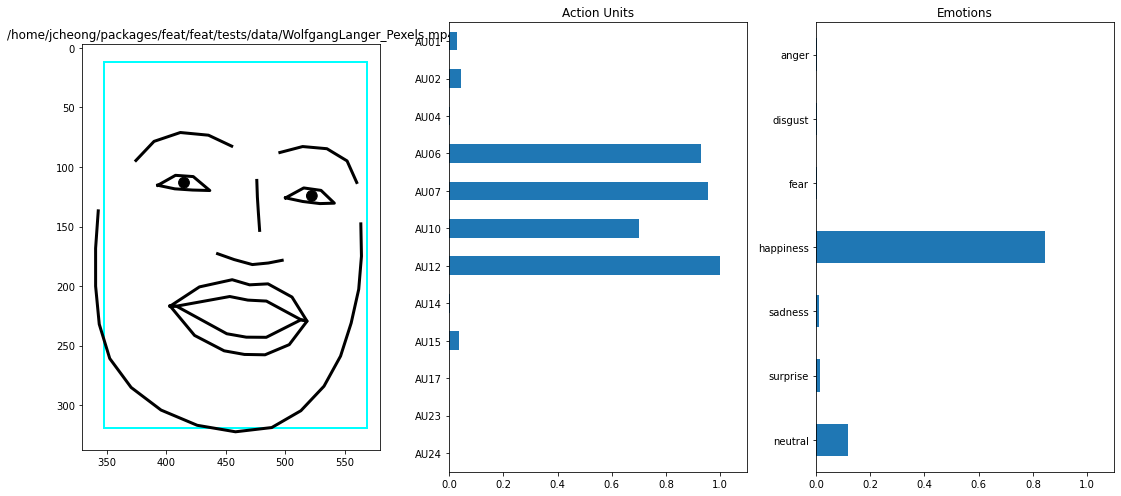

In [7]:
video_prediction.iloc[[13*24]].plot_detections();

We can also leverage existing pandas plotting functions to show how emotions unfold over time. We can clearly see how her emotions change from sadness to happiness.

<AxesSubplot:>

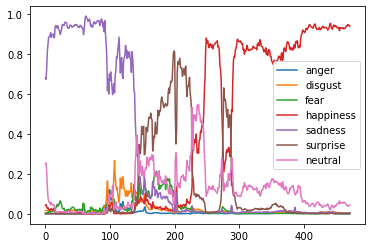

In [12]:
video_prediction.emotions().plot()

In situations you don't need predictions for EVERY frame of the video, you can specify how many frames to skip with `skip_frames`.

In [10]:
video_prediction = detector.detect_video(test_video, skip_frames=20)
video_prediction

/home/jcheong/packages/feat/feat/emo_detectors/ferNet/ferNet_test.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_emo_softmax = nn.functional.softmax(


,frame,FaceRectX,FaceRectY,FaceRectWidth,FaceRectHeight,FaceScore,x_0,x_1,x_2,x_3,...,AU23,AU24,anger,disgust,fear,happiness,sadness,surprise,neutral,input
0,0.0,334.117889,54.037693,215.074738,293.471466,0.999814,329.997266,331.559383,336.836954,344.936493,...,0.010879,2.144145e-03,0.002376,0.017735,0.003534,0.043448,0.679344,0.000382,0.253180,/home/jcheong/packages/feat/feat/tests/data/Wo...
20,20.0,345.315521,50.246700,209.266937,285.912537,0.999865,341.547993,341.953766,344.908072,350.935955,...,0.004495,6.515096e-05,0.000385,0.007921,0.047638,0.004685,0.931002,0.000528,0.007840,/home/jcheong/packages/feat/feat/tests/data/Wo...
40,40.0,371.669556,67.396049,202.619385,284.222137,0.999776,369.287267,366.912197,367.318749,369.762106,...,0.000004,6.008734e-09,0.001130,0.016735,0.028055,0.002594,0.943883,0.000054,0.007549,/home/jcheong/packages/feat/feat/tests/data/Wo...
60,60.0,334.266724,53.615170,205.271545,288.509247,0.999382,330.865895,328.752478,329.076178,331.629985,...,0.000068,5.428853e-07,0.001213,0.022268,0.047338,0.000046,0.927586,0.000061,0.001487,/home/jcheong/packages/feat/feat/tests/data/Wo...
80,80.0,321.414734,77.334610,211.284485,307.020264,0.998917,320.852148,320.785224,323.195517,327.355516,...,0.000848,1.031232e-05,0.004403,0.013541,0.014029,0.000276,0.966207,0.000075,0.001468,/home/jcheong/packages/feat/feat/tests/data/Wo...
100,100.0,318.838959,68.266754,209.228363,284.455872,0.999052,344.003722,346.941046,352.676120,360.579674,...,0.017789,1.165615e-02,0.116049,0.050452,0.018061,0.036182,0.669502,0.023323,0.086431,/home/jcheong/packages/feat/feat/tests/data/Wo...
120,120.0,337.243988,95.725853,212.628021,269.459351,0.999600,346.483702,350.850075,358.057220,366.815067,...,0.055902,2.022403e-03,0.062257,0.185951,0.039216,0.000690,0.678152,0.008728,0.025006,/home/jcheong/packages/feat/feat/tests/data/Wo...
140,140.0,352.502472,58.126644,201.449615,285.656891,0.999631,342.969811,343.754622,348.152331,355.479260,...,0.062459,3.628837e-03,0.009199,0.100385,0.085749,0.051670,0.398730,0.053393,0.300874,/home/jcheong/packages/feat/feat/tests/data/Wo...
160,160.0,337.957184,19.365978,205.994598,298.821014,0.999720,333.286925,330.563057,332.222516,338.064620,...,0.000009,4.677405e-08,0.003045,0.025650,0.113392,0.048234,0.085036,0.483756,0.240886,/home/jcheong/packages/feat/feat/tests/data/Wo...
180,180.0,337.540100,23.954981,208.278259,293.569366,0.999660,334.904558,332.809211,334.318491,339.388947,...,0.000014,8.630889e-08,0.002085,0.016225,0.139893,0.023396,0.076215,0.586103,0.156083,/home/jcheong/packages/feat/feat/tests/data/Wo...
